In [1]:
#Import libraries
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras import utils 
from keras import backend as K
import tensorflow.keras as K
from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

In [2]:
PATH = os.getcwd()
# Define data path
data_path = 'Dataset'
data_dir_list = os.listdir(data_path)  
data_dir_list
img_rows = 224
img_cols = 224
num_channel = 3
num_epoch = 90


# Define the number of classes
num_classes = 5
img_data_list = []

for dataset in data_dir_list:
    print(dataset)
    #img_list = os.listdir(data_path + '/' + dataset)
    excluded_files = [".DS_Store", ".Trashes"]
    
    try:
        img_list = [img for img in os.listdir(data_path + '/' + dataset) if img not in excluded_files]
        print('Loaded the images of dataset-' + '{}\n'.format(dataset))
        for img in img_list:
            # Your image processing code here
            input_img = cv2.imread(data_path + '/' + dataset + '/' + img)
            if input_img is not None:  # Check if the image is loaded successfully
                input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
                input_img_resize = cv2.resize(input_img, (224, 224))
                img_data_list.append(input_img_resize)
    except NotADirectoryError:
        print(f"Ignoring hidden file: {dataset}/.DS_Store")
    


img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)


# Set image data format to 'channels_last' (for TensorFlow backend)
K.backend.set_image_data_format('channels_last')

if num_channel == 3:
    if K.backend.image_data_format() == 'channels_first':
        img_data = np.expand_dims(img_data, axis=1)
        print(img_data.shape)
    else:
        img_data = np.expand_dims(img_data, axis=3)
        print(img_data.shape)
else:
    if K.backend.image_data_format() == 'channels_first':
        img_data = np.rollaxis(img_data, 3, 1)
        print(img_data.shape)



Avocado
Loaded the images of dataset-Avocado

.DS_Store
Ignoring hidden file: .DS_Store/.DS_Store
Guava
Loaded the images of dataset-Guava

Mango
Loaded the images of dataset-Mango

African_Almond
Loaded the images of dataset-African_Almond

Cashew
Loaded the images of dataset-Cashew

(5000, 224, 224)
(5000, 224, 224, 1)


X_train shape = (4000, 224, 224, 1)
X_test shape = (1000, 224, 224, 1)


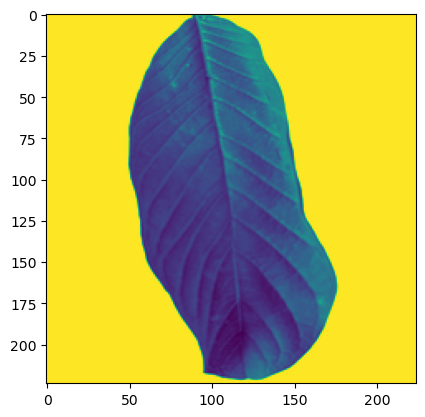

In [3]:
# Importing defaultdict
from collections import defaultdict

# Rest of your code goes here...

# Assigning Labels & define the number of classes
num_classes = 5
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1000]=0
labels[1000:2000]=1
labels[2000:3000]=2
labels[3000:4000]=3
labels[4000:5000]=4
names = ['African_Almond', 'Avocado', 'Cashew', 'Guava','Mango']

# Convert class labels to on-hot encoding
Y = utils.to_categorical(labels, num_classes)

# Shuffle and Split the dataset while maintaining the test size for each class
x_by_class = defaultdict(list)
y_by_class = defaultdict(list)

for i, label in enumerate(Y):
    x_by_class[np.argmax(label)].append(img_data[i])
    y_by_class[np.argmax(label)].append(label)

X_train, X_test, y_train, y_test = [], [], [], []

for class_index in range(num_classes):
    x_class = x_by_class[class_index]
    y_class = y_by_class[class_index]
    x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=200/len(x_class), random_state=2)
    X_train.extend(x_train_class)
    X_test.extend(x_test_class)
    y_train.extend(y_train_class)
    y_test.extend(y_test_class)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Shuffle the training set
X_train, y_train = shuffle(X_train, y_train, random_state=2)

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

image = X_train[36,:].reshape((224,224))
plt.imshow(image)
plt.show()





In [ ]:
#  Designing and training a CNN model in Keras

model = Sequential()

model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

model.summary()

from tensorflow.keras.optimizers import RMSprop

# Create the optimizer
optimizer = Adam(learning_rate=0.001)

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer= optimizer,metrics=["accuracy"])

import time

# Start the timer for training
start_time = time.time()

# Train 0
# Training
hist = model.fit(X_train, y_train, batch_size=7, epochs=90, verbose=1, validation_data=(X_test, y_test))

# End the timer for training
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Start the timer for testing
start_time = time.time()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# End the timer for testing
end_time = time.time()

# Calculate testing time
testing_time = end_time - start_time
print("Testing Time: {:.2f} seconds".format(testing_time))
model.save_weights('model_weights-leaf.weights.h5')  # Change to 'model_weights-leaf.weights.h5'

model.save('model_keras_leaf.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1]*100)

/Users/muhammadyekini/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             

 Total params: 6,590,021 (25.14 MB)

 Trainable params: 6,588,517 (25.13 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 76s 130ms/step - accuracy: 0.3970 - loss: 1.8886 - val_accuracy: 0.5480 - val_loss: 1.2187
Epoch 2/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.5818 - loss: 1.1419 - val_accuracy: 0.4460 - val_loss: 2.2318
Epoch 3/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.6394 - loss: 1.0101 - val_accuracy: 0.3750 - val_loss: 3.9231
Epoch 4/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.7032 - loss: 0.8346 - val_accuracy: 0.5800 - val_loss: 2.0413
Epoch 5/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.7142 - loss: 0.7964 - val_accuracy: 0.2220 - val_loss: 4.5263
Epoch 6/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 77s 135ms/step - accuracy: 0.7464 - loss: 0.7175 - val_accuracy: 0.7160 - val_loss: 0.9576
Epoch 7/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 86s 150ms/step - accuracy: 0.7804 - loss: 0.5991 - val_accuracy: 0.5950 - val_loss: 1.4140
Epoch 8/90
572/572 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - accuracy: 0.8047 - loss: 0

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

test_image = X_test[0:1]
print(test_image.shape)
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)
print(predictions)
print(predicted_class)
print(y_test[0:1])


image = test_image.reshape((224,224))
plt.imshow(image)
plt.show()


In [ ]:
#'C:/Users/USER/Desktop/Data/Dataset
test_img = cv2.imread('Dataset/Mango/105.jpg')
if test_img is None:
    print("Error: Failed to read the image file.")
else:
    # Continue processing the image
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    test_img = cv2.resize(test_img, (224, 224))
    test_img = np.array(test_img)

In [ ]:
# Reshape if necessary (check your model's input shape)
new_image = np.expand_dims(test_img, axis=0)  # Add batch dimension

# Make prediction
predictions = model.predict(new_image)

# Get the most likely class
predicted_class = np.argmax(predictions)

# Print the predicted class name (optional)
print(f"Predicted Class: {target_names[predicted_class]}")


In [ ]:
# Assuming you have a preprocessed image named 'new_image'
from tensorflow.keras.models import load_model

# Load the model architecture
model_saved = load_model('model_keras_leaf.h5')

# Load the checkpoint weights (replace with your checkpoint path)
model_saved.load_weights('model_weights-leaf.weights.h5')

# Make prediction on the new image
predictions = model_saved.predict(new_image)

# Optional: Extract the most likely class
predicted_class = np.argmax(predictions)

# Print the predicted class (assuming you have class names)
print(f"Predicted Class: {target_names[predicted_class]}")


# Evaluate the model on the testing data (assuming you have X_test and y_test)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.input, K.learning_phase()], [model.layers[layer_idx].output])
    activations = get_activations([X_batch, 0])
    return activations[0]

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)

target_names=['Class 0 (African_Almond)', 'Class 1 (Avocado)', 'Class 2 (Cashew)', 'Class 3 (Guava)','Class 4 (Mango)']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))

print('Confusion Matrix \n')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix with Normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()


plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion Matrix without Normalisation')
plt.show()
